In [1]:
import math
from datetime import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
# Documents/me/battery/Warivo Charger 6A.xlsx
df = pd.read_excel('./Warivo Charger 6A.xlsx', "TimeSeriesData")
df

CPU times: total: 27.3 s
Wall time: 56.7 s


,Time,Bms_Life,SumVoltage,Current,SOC,ChgMOS,DisChgMOS,SerialNum,TempNum,RemainCap,...,CycleTime,DI1,DI2,DI3,DI4,DO1,DO2,DO3,DO4,BoardNum
0,1900-01-01 23:08:08,1,48.2,5.8,0.0,ON,ON,16,4,0.000,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1
1,1900-01-01 23:08:10,2,48.2,5.7,0.0,ON,ON,16,4,0.000,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1
2,1900-01-01 23:08:11,2,48.3,5.7,0.0,ON,ON,16,4,0.000,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1
3,1900-01-01 23:08:12,5,48.3,5.7,0.0,ON,ON,16,4,0.000,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1
4,1900-01-01 23:08:13,6,48.3,5.7,0.0,ON,ON,16,4,0.000,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,1900-01-02 09:37:50,151,59.7,1.6,56.6,ON,ON,16,4,29.432,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1
30484,1900-01-02 09:37:52,152,59.7,4.5,56.6,ON,ON,16,4,29.432,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1
30485,1900-01-02 09:37:52,152,59.7,4.5,56.6,ON,ON,16,4,29.432,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1
30486,1900-01-02 09:37:53,153,59.8,5.4,56.6,ON,ON,16,4,29.432,...,12,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,1


In [3]:
req_cols = ["Time", "Bms_Life", "SumVoltage", "Current", "SOC"]

In [4]:
df_selected = df[req_cols]
df_selected["Time"] = pd.to_datetime(df_selected["Time"]) # , format="%Y/%m/%d %H:%M:%S"
df_selected.dtypes
df_selected.head(10)

C:\Users\Vision Group\AppData\Local\Temp\ipykernel_24796\2971448940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Time"] = pd.to_datetime(df_selected["Time"]) # , format="%Y/%m/%d %H:%M:%S"


,Time,Bms_Life,SumVoltage,Current,SOC
0,1900-01-01 23:08:08,1,48.2,5.8,0.0
1,1900-01-01 23:08:10,2,48.2,5.7,0.0
2,1900-01-01 23:08:11,2,48.3,5.7,0.0
3,1900-01-01 23:08:12,5,48.3,5.7,0.0
4,1900-01-01 23:08:13,6,48.3,5.7,0.0
5,1900-01-01 23:08:14,7,48.3,5.7,0.0
6,1900-01-01 23:08:16,8,48.3,5.6,0.0
7,1900-01-01 23:08:17,10,48.4,5.6,0.0
8,1900-01-01 23:08:18,11,48.4,5.6,0.0
9,1900-01-01 23:08:20,13,48.4,5.6,0.0


In [5]:
# df_selected["Time"].shift(1)
df_selected["Time_Lag1"] = df_selected["Time"].shift(1)
df_selected["Time_Snap"] = (df_selected["Time"] - df_selected["Time_Lag1"]).dt.total_seconds()
df_selected["Time_Sec"] = df_selected["Time_Snap"].fillna(0).cumsum(axis=0)

df_selected

C:\Users\Vision Group\AppData\Local\Temp\ipykernel_24796\1153263415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Time_Lag1"] = df_selected["Time"].shift(1)
C:\Users\Vision Group\AppData\Local\Temp\ipykernel_24796\1153263415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Time_Snap"] = (df_selected["Time"] - df_selected["Time_Lag1"]).dt.total_seconds()
C:\Users\Vision Group\AppData\Local\Temp\ipykernel_24796\1153263415.py:4: SettingWithCopyWarning: 
A value is trying to b

,Time,Bms_Life,SumVoltage,Current,SOC,Time_Lag1,Time_Snap,Time_Sec
0,1900-01-01 23:08:08,1,48.2,5.8,0.0,NaT,NaN,0.0
1,1900-01-01 23:08:10,2,48.2,5.7,0.0,1900-01-01 23:08:08,2.0,2.0
2,1900-01-01 23:08:11,2,48.3,5.7,0.0,1900-01-01 23:08:10,1.0,3.0
3,1900-01-01 23:08:12,5,48.3,5.7,0.0,1900-01-01 23:08:11,1.0,4.0
4,1900-01-01 23:08:13,6,48.3,5.7,0.0,1900-01-01 23:08:12,1.0,5.0
...,...,...,...,...,...,...,...,...
30483,1900-01-02 09:37:50,151,59.7,1.6,56.6,1900-01-02 09:37:49,1.0,37782.0
30484,1900-01-02 09:37:52,152,59.7,4.5,56.6,1900-01-02 09:37:50,2.0,37784.0
30485,1900-01-02 09:37:52,152,59.7,4.5,56.6,1900-01-02 09:37:52,0.0,37784.0
30486,1900-01-02 09:37:53,153,59.8,5.4,56.6,1900-01-02 09:37:52,1.0,37785.0


In [6]:
req_cols = ['Time', 'Time_Sec', 'Bms_Life', 'SumVoltage', 'Current', 'SOC']
df_selected = df_selected[req_cols]

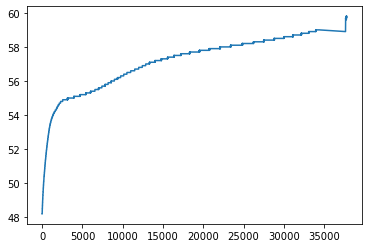

In [7]:
plt.plot(df_selected["Time_Sec"], df_selected["SumVoltage"])
plt.show()

In [12]:
z = np.polyfit(df_selected.Time_Sec, df_selected.SumVoltage, 3)
z

array([ 2.97544773e-13, -2.06904857e-08,  5.42586797e-04,  5.28278182e+01])

In [9]:
def get_poly_val(degree:int, **kwargs):
    """
        y = a + bx + cx^2 + dx^3
    """
    for i in kwargs.keys():
        globals()[i] = kwargs[i]
    if degree == 1:
        pass
    elif degree == 2:
        pass
    elif degree == 3:
        return a + b*x + c*pow(x, 2) + d*pow(x, 3)
    elif degree == 4:
        pass

In [10]:
get_poly_val(degree=len(z)-1, a=z[-1], b=z[-2], c=z[-3], d=z[-4], x=37780)

59.83957286950786